In [1]:
import math
from sympy import *
from sympy.physics.mechanics import ReferenceFrame
init_printing(use_latex='mathjax')

import sys
sys.path.append(
   "c:\\Users\\diego\\Dropbox\\Academic\\MEng Space Systems\\3. DOCA\\ADCS functions")
import ADCS_Functions as adcs
import ADCS_Functions_sym as adcs_sym

In [2]:
## Define symbols
x, y, z = symbols('mu gamma psi')
x,y,z

# Could also define as:
# x, y, z = symbols("theta_1 theta_2 theta_3")
# dotx, doty, dotz = symbols(r"\dot{\theta_1} \dot{\theta_2} \dot{\theta_3}")

(μ, γ, ψ)

In [3]:
## Elementary rotation matrices Functions:

def C1(angle):
    x = symbols('x')
    Rx = Matrix([
        [1, 0, 0],
        [0, cos(x), sin(x)],
        [0, -sin(x), cos(x)]])
    return Rx.subs(x, angle)


def C2(angle):
    y = symbols('y')
    Ry = Matrix([
        [cos(y), 0, -sin(y)],
        [0,  1, 0],
        [sin(y), 0, cos(y)]])
    return Ry.subs(y, angle)


def C3(angle):
    z = symbols('z')
    Rz = Matrix([
        [cos(z), sin(z), 0],
        [-sin(z),  cos(z), 0],
        [0,    0, 1]])
    return Rz.subs(z, angle)


In [4]:
class IJKReferenceFrame(ReferenceFrame):
    def __init__(self, name):
        super().__init__(name, latexs=['\mathbf{%s}_{%s}' % (
            idx, name) for idx in ("i", "j", "k")])
        self.i = self.x
        self.j = self.y
        self.k = self.z

## 3-2-3 Euler angles rotation matrices
Find the Euler rotation matrix C21 in terms of 3-2-3 Euler angles rotation sequence, with angles ϴ1, ϴ2, ϴ3. Specifically, frame 2 is obtained from frame 1 by:

 - A rotation ϴ1 about the z-axis (3-axis) of frame 1,
 - a rotation ϴ2 about the y-axis (2-axis) of intermediate frame,
 - a rotation ϴ3 about the z-axis (3-axis) of the transformed frame.

In [5]:
# 3-2-3 Euler angles rotation matrices

# Ctot(x,y,z) = C3(x) * C2(y) * C3(z)

C3_x = C3(x)
C2_y = C2(y)
C3_z = C3(z)

R_zyz = C3_z * C2_y * C3_x
R_zyz

⎡-sin(μ)⋅sin(ψ) + cos(γ)⋅cos(μ)⋅cos(ψ)  sin(μ)⋅cos(γ)⋅cos(ψ) + sin(ψ)⋅cos(μ)  
⎢                                                                             
⎢-sin(μ)⋅cos(ψ) - sin(ψ)⋅cos(γ)⋅cos(μ)  -sin(μ)⋅sin(ψ)⋅cos(γ) + cos(μ)⋅cos(ψ) 
⎢                                                                             
⎣            sin(γ)⋅cos(μ)                          sin(γ)⋅sin(μ)             

 -sin(γ)⋅cos(ψ)⎤
               ⎥
 sin(γ)⋅sin(ψ) ⎥
               ⎥
     cos(γ)    ⎦

In [6]:
# Or using the library:
adcs_sym.DCM('sim', 3, 2, 3)

⎡-sin(x)⋅sin(z) + cos(x)⋅cos(y)⋅cos(z)  sin(x)⋅cos(y)⋅cos(z) + sin(z)⋅cos(x)  
⎢                                                                             
⎢-sin(x)⋅cos(z) - sin(z)⋅cos(x)⋅cos(y)  -sin(x)⋅sin(z)⋅cos(y) + cos(x)⋅cos(z) 
⎢                                                                             
⎣            sin(y)⋅cos(x)                          sin(x)⋅sin(y)             

 -sin(y)⋅cos(z)⎤
               ⎥
 sin(y)⋅sin(z) ⎥
               ⎥
     cos(y)    ⎦

_______________________

#### Examples from the lecture using the library:

In [7]:
# Example 3-2-1 as in slide 35 of Lecture 6:

adcs_sym.DCM('sim', 3, 2, 1, invorder=True)

⎡           cos(y)⋅cos(z)                          sin(z)⋅cos(y)              
⎢                                                                             
⎢sin(x)⋅sin(y)⋅cos(z) - sin(z)⋅cos(x)  sin(x)⋅sin(y)⋅sin(z) + cos(x)⋅cos(z)   
⎢                                                                             
⎣sin(x)⋅sin(z) + sin(y)⋅cos(x)⋅cos(z)  -sin(x)⋅cos(z) + sin(y)⋅sin(z)⋅cos(x)  

   -sin(y)   ⎤
             ⎥
sin(x)⋅cos(y)⎥
             ⎥
cos(x)⋅cos(y)⎦

In [8]:
# Example 3-1-3 as in slide 33 of Lecture 6:

adcs_sym.DCM('sim', 3, 1, 3, invorder=True)


⎡-sin(x)⋅sin(z)⋅cos(y) + cos(x)⋅cos(z)  sin(x)⋅cos(y)⋅cos(z) + sin(z)⋅cos(x)  
⎢                                                                             
⎢-sin(x)⋅cos(z) - sin(z)⋅cos(x)⋅cos(y)  -sin(x)⋅sin(z) + cos(x)⋅cos(y)⋅cos(z) 
⎢                                                                             
⎣            sin(y)⋅sin(z)                         -sin(y)⋅cos(z)             

 sin(x)⋅sin(y)⎤
              ⎥
 sin(y)⋅cos(x)⎥
              ⎥
    cos(y)    ⎦

#### End of examples from the lecture using the library.
____________________

### Find from the 3-2-3 Euler rotation matrix the appropriate Euler angles

You can get this by looking at the matrix:
1. Since $R_{zyz}$[2,2] = cos($\gamma$) -> $\gamma$ = $cos^{-1}$($R_{zyz}$[2,2])
2. Then you can get $\mu$ by doing $\frac{R_{zyz}[2,1]}{R_{zyz}[2,0]}$. Therefore, you get $tan(\mu)$ = $\frac{R_{zyz}[2,1]}{R_{zyz}[2,0]}$
3. Similarly, you can get $\psi$ by doing $\frac{R_{zyz}[1,2]}{R_{zyz}[0,2]}$

Note that the notation used for indices corresponds to that of Python

In [9]:
x = trigsimp(atan(R_zyz[2, 1] / R_zyz[2, 0]))
y = trigsimp(acos(R_zyz[2, 2]))
z = -trigsimp(atan(R_zyz[1, 2] / R_zyz[0, 2]))
x,y,z

(atan(tan(μ)), acos(cos(γ)), atan(tan(ψ)))

### For the 3-2-3 Euler sequence, derive the kinematic differential equation

To do this start from the fact that the sequence is:   $C_3(\theta_3)$ $\leftarrow$ $C_2(\theta_2)$ $\leftarrow$ $C_3(\theta_1)$

We then know that:

- $C_3(\theta_1)$: $A' \leftarrow A$: $\hspace{1em}$ $\vec{\omega}^{A'/A}$
- $C_2(\theta_2)$: $A'' \leftarrow A'$: $\hspace{1em}$ $\vec{\omega}^{A''/A'}$
- $C_3(\theta_3)$: $B \leftarrow A''$: $\hspace{1em}$ $\vec{\omega}^{B/A''}$

And that:

- $\vec{\omega}^{A'/A}$ = $\dot{\theta_1} \vec{a_3}$ = $\dot{\theta_1} \vec{a'_3}$
- $\vec{\omega}^{A''/A'}$ = $\dot{\theta_2} \vec{a'_2}$ = $\dot{\theta_2} \vec{a''_2}$
- $\vec{\omega}^{B/A''}$ = $\dot{\theta_3} \vec{a''_1}$ = $\dot{\theta_3} \vec{b_1}$

Also: $\hspace{1em}$ $\vec{\omega}^{B/A} = \vec{\omega}^{B/A''}+\vec{\omega}^{A''/A'}+\vec{\omega}^{A'/A}$ = $\dot{\theta_3} \vec{b_1} + \dot{\theta_2} \vec{a''_2} + \dot{\theta_1} \vec{a'_3}$

Therefore,

$\vec{\omega}^{B/A} = \begin{bmatrix} \vec{b_1} & \vec{b_2} & \vec{b_3} \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ \dot{\theta_3} \end{bmatrix} + 
                      \begin{bmatrix} \vec{a''_1} & \vec{a''_2} & \vec{a''_3} \end{bmatrix} \begin{bmatrix} 0 \\ \dot{\theta_2} \\ 0 \end{bmatrix} +
                      \begin{bmatrix} \vec{a'_1} & \vec{a'_2} & \vec{a'_3} \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ \dot{\theta_1} \end{bmatrix}$

And since we know that:

- $\begin{bmatrix} \vec{a''_1} & \vec{a''_2} & \vec{a''_3} \end{bmatrix} = \begin{bmatrix} \vec{b_1} & \vec{b_2} & \vec{b_3} \end{bmatrix} C_3(\theta_3)$
- $\begin{bmatrix} \vec{a'_1} & \vec{a'_2} & \vec{a'_3} \end{bmatrix} = \begin{bmatrix} \vec{b_1} & \vec{b_2} & \vec{b_3} \end{bmatrix} C_3(\theta_3) C_2(\theta_2)$

And by definition:

$\vec{\omega}^{B/A} = \omega_1 \vec{b_1} + \omega_2 \vec{b_2} + \omega_3 \vec{b_3}$

We get:

$\begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \dot{\theta_3} \end{bmatrix} + 
                      C_3(\theta_3) \begin{bmatrix} 0 \\ \dot{\theta_2} \\ 0 \end{bmatrix} +
                      C_3(\theta_3) C_2(\theta_2) \begin{bmatrix} 0 \\ 0 \\ \dot{\theta_1} \end{bmatrix}$



In [10]:
#x, y, z = symbols('mu gamma psi')

#dotx, doty, dotz = symbols('\dot{\mu} \dot{\gamma} \dot{\psi}')
#omegax, omegay, omegaz = symbols('\omega_mu \omega_gamma \omega_psi')

x, y, z = symbols("theta_1 theta_2 theta_3")
dotx, doty, dotz = symbols(r"\dot{\theta_1} \dot{\theta_2} \dot{\theta_3}")


matrix = simplify(Matrix([0, 0, dotz])) + C3(z)*(Matrix([0, doty, 0])) + \
    C3(z) * C2(y) * (Matrix([0, 0, dotx]))
matrix


⎡-\dot{\theta_1}⋅sin(θ₂)⋅cos(θ₃) + \dot{\theta_2}⋅sin(θ₃)⎤
⎢                                                        ⎥
⎢\dot{\theta_1}⋅sin(θ₂)⋅sin(θ₃) + \dot{\theta_2}⋅cos(θ₃) ⎥
⎢                                                        ⎥
⎣        \dot{\theta_1}⋅cos(θ₂) + \dot{\theta_3}         ⎦

In [11]:
def get_matrix_terms(matrix, dotx, doty, dotz):
    """
    Expand the terms of a 3x1 matrix into a 3x3 matrix(with the coefficients).
    Example use: When deriving the kinematic differential equation get the coefficients of the 
                 3x1 matrix containing the angular velocity components (dotx, doty, dotz)
    """
    return Matrix([
        [matrix[0].coeff(dotx), matrix[0].coeff(doty), matrix[0].coeff(dotz)],
        [matrix[1].coeff(dotx), matrix[1].coeff(doty), matrix[1].coeff(dotz)],
        [matrix[2].coeff(dotx), matrix[2].coeff(doty), matrix[2].coeff(dotz)]])


In [12]:
matrix = get_matrix_terms(matrix, dotx, doty, dotz)
matrix

⎡-sin(θ₂)⋅cos(θ₃)  sin(θ₃)  0⎤
⎢                            ⎥
⎢sin(θ₂)⋅sin(θ₃)   cos(θ₃)  0⎥
⎢                            ⎥
⎣    cos(θ₂)          0     1⎦

To get this in the form that is in the class examples, put it in the form [3x3 Matrix] = [dox, doty, dotz].T

_______________________________________

Note! Example for 3-2-1 Euler angles 

STARTS HERE:

In [13]:
# Example for 3-2-1 Euler angles
ex = simplify((Matrix([dotx, 0, 0])) + C1(x)*(Matrix([0, doty, 0])) +
         C1(x) * C2(y) * (Matrix([0, 0, dotz])))
ex

⎡        \dot{\theta_1} - \dot{\theta_3}⋅sin(θ₂)         ⎤
⎢                                                        ⎥
⎢\dot{\theta_2}⋅cos(θ₁) + \dot{\theta_3}⋅sin(θ₁)⋅cos(θ₂) ⎥
⎢                                                        ⎥
⎣-\dot{\theta_2}⋅sin(θ₁) + \dot{\theta_3}⋅cos(θ₁)⋅cos(θ₂)⎦

In [14]:
get_matrix_terms(ex, dotx, doty, dotz)

⎡1     0         -sin(θ₂)    ⎤
⎢                            ⎥
⎢0  cos(θ₁)   sin(θ₁)⋅cos(θ₂)⎥
⎢                            ⎥
⎣0  -sin(θ₁)  cos(θ₁)⋅cos(θ₂)⎦

In [15]:
# Using the library to get the terms of the matrix for 3-2-1 Euler angles kinematic differential equation: 
# As in the slide 78 of Lecture 6:

simplify(adcs_sym.diff_kinem_Euler_theta_matrix(3, 2, 1, invorder=True)*cos(y))


⎡cos(θ₂)  sin(θ₁)⋅sin(θ₂)  sin(θ₂)⋅cos(θ₁) ⎤
⎢                                          ⎥
⎢   0     cos(θ₁)⋅cos(θ₂)  -sin(θ₁)⋅cos(θ₂)⎥
⎢                                          ⎥
⎣   0         sin(θ₁)          cos(θ₁)     ⎦

In [16]:
# Just to show what I am solving for:
import numpy as np
time_sym = Symbol('t')
aa = Matrix([dotx, doty, dotz]) 
bb = (1 / cos(y)) 
cc = simplify(adcs_sym.diff_kinem_Euler_theta_matrix(3, 2, 1, invorder=True)*cos(y))
dd = Matrix([sin(0.1*time_sym), 0.01, cos(0.1*time_sym)]) * np.deg2rad(5)

aa, bb, cc, dd

⎛⎡\dot{\theta_1}⎤           ⎡cos(θ₂)  sin(θ₁)⋅sin(θ₂)  sin(θ₂)⋅cos(θ₁) ⎤  ⎡0.0
⎜⎢              ⎥     1     ⎢                                          ⎥  ⎢   
⎜⎢\dot{\theta_2}⎥, ───────, ⎢   0     cos(θ₁)⋅cos(θ₂)  -sin(θ₁)⋅cos(θ₂)⎥, ⎢   
⎜⎢              ⎥  cos(θ₂)  ⎢                                          ⎥  ⎢   
⎝⎣\dot{\theta_3}⎦           ⎣   0         sin(θ₁)          cos(θ₁)     ⎦  ⎣0.0

872664625997165⋅sin(0.1⋅t)⎤⎞
                          ⎥⎟
 0.000872664625997165     ⎥⎟
                          ⎥⎟
872664625997165⋅cos(0.1⋅t)⎦⎠

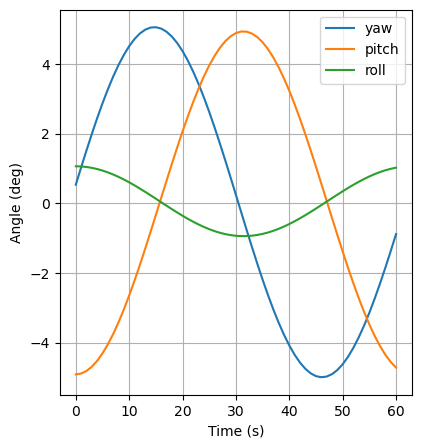

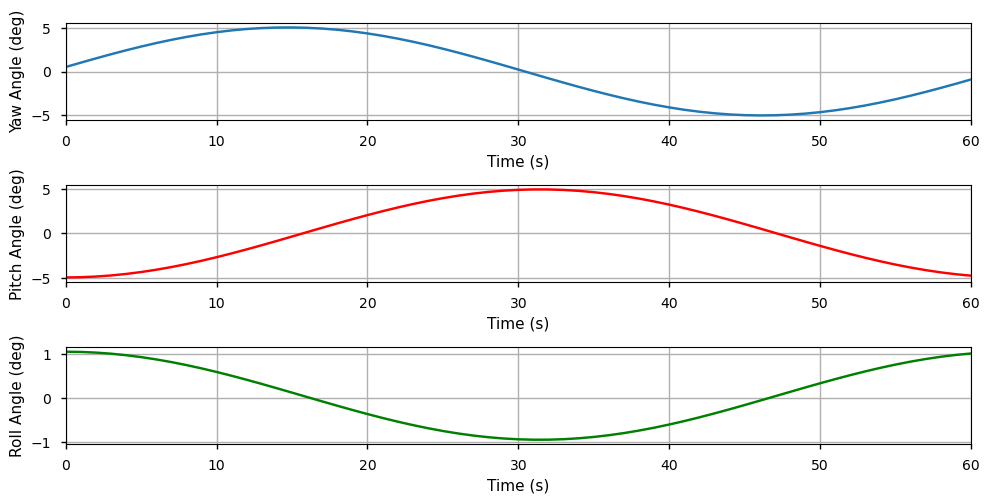

In [17]:
### IT IS NOT GIVING THE CORRECT RESULTS! Compare to use of Solve_KDE function for 3-2-1 Euler angles 

time = np.linspace(0, 60, 61)
theta= np.deg2rad([80, 30, 40])
time_sym = Symbol('t')
w = Matrix([sin(0.1*time_sym), 0.01, cos(0.1*time_sym)]) * np.deg2rad(5)

dotangles = adcs.solve_Euler_KDE(time, theta, 3, 2, 1, w=w, invorder=True)


ENDS HERE

_______________________________________

To check if the inversion matrix is the one given in the problem, we compute the following:

In [18]:
invmatrix =simplify(matrix.inv())  
invmatrix

⎡-cos(θ₃)    sin(θ₃)    ⎤
⎢─────────   ───────   0⎥
⎢ sin(θ₂)    sin(θ₂)    ⎥
⎢                       ⎥
⎢ sin(θ₃)    cos(θ₃)   0⎥
⎢                       ⎥
⎢ cos(θ₃)   -sin(θ₃)    ⎥
⎢ ───────   ─────────  1⎥
⎣ tan(θ₂)    tan(θ₂)    ⎦

In [19]:
# Or using the library:
adcs_sym.diff_kinem_Euler_theta_matrix(3, 2, 3)

⎡-cos(θ₃)    sin(θ₃)    ⎤
⎢─────────   ───────   0⎥
⎢ sin(θ₂)    sin(θ₂)    ⎥
⎢                       ⎥
⎢ sin(θ₃)    cos(θ₃)   0⎥
⎢                       ⎥
⎢ cos(θ₃)   -sin(θ₃)    ⎥
⎢ ───────   ─────────  1⎥
⎣ tan(θ₂)    tan(θ₂)    ⎦

In [20]:
# Show how the matrix would look like (instead of a comma it should be a dot product)
1/sin(y), simplify(invmatrix*sin(y))


⎛         ⎡   -cos(θ₃)          sin(θ₃)          0   ⎤⎞
⎜   1     ⎢                                          ⎥⎟
⎜───────, ⎢sin(θ₂)⋅sin(θ₃)  sin(θ₂)⋅cos(θ₃)      0   ⎥⎟
⎜sin(θ₂)  ⎢                                          ⎥⎟
⎝         ⎣cos(θ₂)⋅cos(θ₃)  -sin(θ₃)⋅cos(θ₂)  sin(θ₂)⎦⎠

In [21]:
# Check if correct by multiplying the original matrix by its inverse. 
# Should get an Identity matrix

simplify(matrix*invmatrix)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [22]:
if eye(3) == simplify(matrix*invmatrix):
    print("The matrix is correct")
else:
    print("The matrix is incorrect")

The matrix is correct
